In [168]:
import pandas as pd
import numpy as np
from collections import Counter
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%matplotlib inline  
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt

import sklearn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras import optimizers

In [169]:
df = pd.read_csv("cai_training.csv")
df.fillna(value=-1, inplace=True)

real = ['age', 'agpop', 'rice_inc', 'ricearea_2010', 'disaster_loss', 'risk_averse']
categorical = ['educ', 'village']
binary = ['disaster_yes', 'general_trust', 'male', 'literacy']

In [170]:
X_train = df[real+categorical+binary+['intensive', 'takeup_survey']]
X_train1 = X_train[X_train['intensive']==1]
X_train0 = X_train[X_train['intensive']==0]

X_train1.loc[:, real] = StandardScaler().fit_transform(X_train1[real])
X_train0.loc[:, real] = StandardScaler().fit_transform(X_train0[real])

X_train1 = shuffle(X_train1)
X_train0 = shuffle(X_train0)

y_train1 = 100*X_train1['takeup_survey'] - 15*X_train1['intensive']
y_train0 = 100*X_train0['takeup_survey'] - 15*X_train0['intensive']

X_train1.drop(columns=['intensive', 'takeup_survey'], inplace=True)
X_train0.drop(columns=['intensive', 'takeup_survey'], inplace=True)

print X_train1.shape, y_train1.shape
print X_train0.shape, y_train0.shape
# display(X_train1.head(10))

(1959, 12) (1959,)
(2943, 12) (2943,)


In [144]:
df_test = pd.read_csv("predict.csv")
df_test.fillna(value=-1, inplace=True)
X_test = df_test[real+categorical+binary]
X_test.loc[:, real] = StandardScaler().fit_transform(X_test[real])

print X_test.shape
# display(X_test.head(10))

(10000, 11)


In [121]:
def exportPredictions(filename, predict, thresh=0):
    OUT = open(filename, 'w')

    OUT.write("Id,Category\n")
    for index, val in enumerate(predict):
        if val>=thresh: 
            OUT.write("%s,1\n" % (10001+index))
        else:
            OUT.write("%s,0\n" % (10001+index))
    OUT.close()

In [122]:
def plotHistory(history):
    plt.clf()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [123]:
def getDeepModel(X_train):
    model = Sequential()
    
    model.add(Dense(32, input_shape=(X_train.shape[1],), kernel_initializer='lecun_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(16, kernel_initializer='lecun_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(8, kernel_initializer='lecun_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(4, kernel_initializer='lecun_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, kernel_initializer='lecun_normal'))
    model.add(Activation('linear'))
    model.compile(loss='mse', optimizer='adam')
    return model

def getSimpleModel(X_train):
    model = Sequential()
    
    model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],), kernel_initializer='random_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(8, kernel_initializer='random_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(4, kernel_initializer='random_normal'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1, kernel_initializer='random_normal'))
    model.add(Activation('linear'))
    model.compile(loss='mse', optimizer='adam')
    return model


In [132]:
model1 = getDeepModel(X_train1)
model0 = getDeepModel(X_train0)

cb = EarlyStopping(monitor='val_loss', min_delta=1, patience=50, restore_best_weights=True)


In [134]:
history1 = model1.fit(X_train1, y_train1, nb_epoch=250, batch_size=100, shuffle=True, validation_split=0.10, callbacks=[cb])

Epoch 1/250
1959/1959 [==============================] - 0s 103us/step - loss: 2043.6248


/Users/leonyao/anaconda2/envs/15.838/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 2/250
1959/1959 [==============================] - 0s 104us/step - loss: 1972.8444
Epoch 3/250
1959/1959 [==============================] - 0s 101us/step - loss: 2107.2215
Epoch 4/250
1959/1959 [==============================] - 0s 101us/step - loss: 2007.8304
Epoch 5/250
1959/1959 [==============================] - 0s 103us/step - loss: 1925.4007
Epoch 6/250
1959/1959 [==============================] - 0s 113us/step - loss: 2054.2683
Epoch 7/250
1959/1959 [==============================] - 0s 99us/step - loss: 1936.5577
Epoch 8/250
1959/1959 [==============================] - 0s 101us/step - loss: 1991.7720
Epoch 9/250
1959/1959 [==============================] - 0s 104us/step - loss: 2019.9076
Epoch 10/250
1959/1959 [==============================] - 0s 101us/step - loss: 2008.8236
Epoch 11/250
1959/1959 [==============================] - 0s 103us/step - loss: 1982.2744
Epoch 12/250
1959/1959 [==============================] - 0s 115us/step - loss: 2035.0481
Epoch 13/250
1959/1

1959/1959 [==============================] - 0s 106us/step - loss: 1969.2480
Epoch 94/250
1959/1959 [==============================] - 0s 104us/step - loss: 1962.5827
Epoch 95/250
1959/1959 [==============================] - 0s 105us/step - loss: 2049.7249
Epoch 96/250
1959/1959 [==============================] - 0s 104us/step - loss: 1993.7667
Epoch 97/250
1959/1959 [==============================] - 0s 97us/step - loss: 1951.7003
Epoch 98/250
1959/1959 [==============================] - 0s 124us/step - loss: 1987.7811
Epoch 99/250
1959/1959 [==============================] - 0s 101us/step - loss: 1913.3443
Epoch 100/250
1959/1959 [==============================] - 0s 105us/step - loss: 1923.5608
Epoch 101/250
1959/1959 [==============================] - 0s 99us/step - loss: 1918.9239
Epoch 102/250
1959/1959 [==============================] - 0s 103us/step - loss: 1942.7883
Epoch 103/250
1959/1959 [==============================] - 0s 102us/step - loss: 2052.0093
Epoch 104/250
1959/19

1959/1959 [==============================] - 0s 101us/step - loss: 1910.6809
Epoch 184/250
1959/1959 [==============================] - 0s 98us/step - loss: 1919.7509
Epoch 185/250
1959/1959 [==============================] - 0s 104us/step - loss: 1877.3617
Epoch 186/250
1959/1959 [==============================] - 0s 101us/step - loss: 1951.4816
Epoch 187/250
1959/1959 [==============================] - 0s 101us/step - loss: 1864.7592
Epoch 188/250
1959/1959 [==============================] - 0s 98us/step - loss: 1979.8403
Epoch 189/250
1959/1959 [==============================] - 0s 96us/step - loss: 1912.2260
Epoch 190/250
1959/1959 [==============================] - 0s 99us/step - loss: 1900.0678
Epoch 191/250
1959/1959 [==============================] - 0s 99us/step - loss: 1929.3408
Epoch 192/250
1959/1959 [==============================] - 0s 97us/step - loss: 1957.4440
Epoch 193/250
1959/1959 [==============================] - 0s 100us/step - loss: 1905.7725
Epoch 194/250
1959/

In [135]:
history0 = model0.fit(X_train0, y_train0, nb_epoch=250, batch_size=100, shuffle=True, validation_split=0.10, callbacks=[cb])

/Users/leonyao/anaconda2/envs/15.838/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/250
2943/2943 [==============================] - 6s 2ms/step - loss: 5883.1814
Epoch 2/250
2943/2943 [==============================] - 0s 95us/step - loss: 5878.8417
Epoch 3/250
2943/2943 [==============================] - 0s 96us/step - loss: 5870.8506
Epoch 4/250
2943/2943 [==============================] - 0s 96us/step - loss: 5863.0505
Epoch 5/250
2943/2943 [==============================] - 0s 96us/step - loss: 5852.7881
Epoch 6/250
2943/2943 [==============================] - 0s 93us/step - loss: 5847.5744
Epoch 7/250
2943/2943 [==============================] - 0s 93us/step - loss: 5833.3474
Epoch 8/250
2943/2943 [==============================] - 0s 98us/step - loss: 5819.8774
Epoch 9/250
2943/2943 [==============================] - 0s 95us/step - loss: 5807.0816
Epoch 10/250
2943/2943 [==============================] - 0s 94us/step - loss: 5790.8499
Epoch 11/250
2943/2943 [==============================] - 0s 95us/step - loss: 5770.7226
Epoch 12/250
2943/2943 [=======

2943/2943 [==============================] - 0s 97us/step - loss: 2952.1631
Epoch 94/250
2943/2943 [==============================] - 0s 95us/step - loss: 2967.1995
Epoch 95/250
2943/2943 [==============================] - 0s 94us/step - loss: 2874.6596
Epoch 96/250
2943/2943 [==============================] - 0s 97us/step - loss: 2939.5014
Epoch 97/250
2943/2943 [==============================] - 0s 95us/step - loss: 2920.5218
Epoch 98/250
2943/2943 [==============================] - 0s 93us/step - loss: 2981.4708
Epoch 99/250
2943/2943 [==============================] - 0s 93us/step - loss: 2873.2981
Epoch 100/250
2943/2943 [==============================] - 0s 95us/step - loss: 2855.0097
Epoch 101/250
2943/2943 [==============================] - 0s 95us/step - loss: 2828.3418
Epoch 102/250
2943/2943 [==============================] - 0s 93us/step - loss: 2855.6681
Epoch 103/250
2943/2943 [==============================] - 0s 94us/step - loss: 2927.4808
Epoch 104/250
2943/2943 [=====

Epoch 184/250
2943/2943 [==============================] - 0s 95us/step - loss: 2846.3245
Epoch 185/250
2943/2943 [==============================] - 0s 95us/step - loss: 2852.9136
Epoch 186/250
2943/2943 [==============================] - 0s 95us/step - loss: 2767.3483
Epoch 187/250
2943/2943 [==============================] - 0s 94us/step - loss: 2824.4136
Epoch 188/250
2943/2943 [==============================] - 0s 94us/step - loss: 2773.8391
Epoch 189/250
2943/2943 [==============================] - 0s 96us/step - loss: 2833.0999
Epoch 190/250
2943/2943 [==============================] - 0s 94us/step - loss: 2691.3380
Epoch 191/250
2943/2943 [==============================] - 0s 93us/step - loss: 2862.6294
Epoch 192/250
2943/2943 [==============================] - 0s 95us/step - loss: 2735.4084
Epoch 193/250
2943/2943 [==============================] - 0s 96us/step - loss: 2773.4736
Epoch 194/250
2943/2943 [==============================] - 0s 94us/step - loss: 2819.5988
Epoch 195/

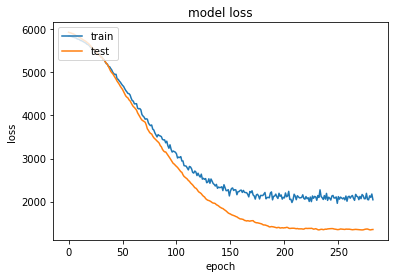

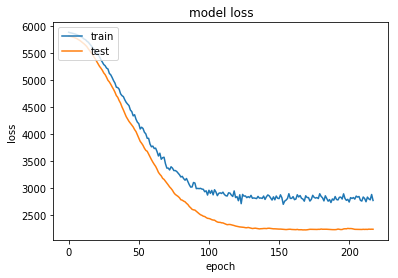

In [128]:
plotHistory(history1)
plotHistory(history0)

In [136]:
predict1 = model1.predict(X_test).reshape(-1)
predict0 = model0.predict(X_test).reshape(-1)
predict = predict1 - predict0
print predict1
print predict0
print sum(predict > 0) / float(len(X_test))

[65.04448  47.626015 27.41344  ... 33.206814 57.878345 65.31195 ]
[62.28788  39.270382 59.29351  ... 40.83476  41.966534 35.74135 ]
0.7053


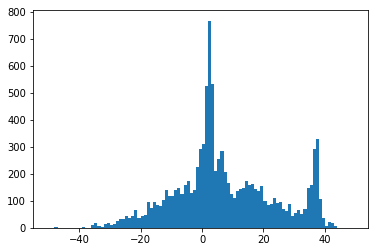

In [137]:
plt.clf()
plt.hist(predict, bins = range(-50, 50, 1))
plt.show()

In [139]:
exportPredictions('output_nn8_full.txt', predict, thresh=0)

# Merge Datasets

In [157]:
df = pd.read_csv("cai_training.csv")
df.fillna(value=-1, inplace=True)

real = ['age', 'agpop', 'rice_inc', 'ricearea_2010', 'disaster_loss', 'risk_averse']
categorical = ['educ', 'village']
binary = ['disaster_yes', 'general_trust', 'male', 'literacy']

In [158]:
X_train = df[real+categorical+binary+['intensive', 'takeup_survey']]

X_train.loc[:, real] = StandardScaler().fit_transform(X_train[real])

X_train = shuffle(X_train)

y_train = 100*X_train['takeup_survey'] - 15*X_train['intensive']

X_train.drop(columns=['takeup_survey'], inplace=True)

print X_train.shape, y_train.shape

(4902, 13) (4902,)


In [160]:
df_test = pd.read_csv("predict.csv")
print df_test.shape
df_test.fillna(value=-1, inplace=True)
X_test = df_test[real+categorical+binary]
X_test.loc[:, real] = StandardScaler().fit_transform(X_test[real])

X_test1 = X_test.copy()
X_test1['intensive'] = 1

X_test0 = X_test.copy()
X_test0['intensive'] = 0

print X_test1.shape, X_test0.shape

(10000, 21)
(10000, 13) (10000, 13)


In [164]:
def getMergeModel(X_train):
    model = Sequential()
    
    model.add(Dense(32, input_shape=(X_train.shape[1],), kernel_initializer='lecun_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(16, kernel_initializer='lecun_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(8, kernel_initializer='lecun_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(4, kernel_initializer='lecun_normal'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, kernel_initializer='lecun_normal'))
    model.add(Activation('linear'))
    model.compile(loss='mse', optimizer='adam')
    return model

In [165]:
model_merge = getMergeModel(X_train)

cb = EarlyStopping(monitor='val_loss', min_delta=1, patience=20, restore_best_weights=True)
history_merge = model_merge.fit(X_train, y_train, nb_epoch=1000, batch_size=100, shuffle=True, validation_split=0.10, callbacks=[cb])


/Users/leonyao/anaconda2/envs/15.838/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 4411 samples, validate on 491 samples
Epoch 1/1000
4411/4411 [==============================] - 8s 2ms/step - loss: 5890.2398 - val_loss: 5707.7408
Epoch 2/1000
4411/4411 [==============================] - 0s 106us/step - loss: 5880.1462 - val_loss: 5695.7907
Epoch 3/1000
4411/4411 [==============================] - 0s 108us/step - loss: 5866.1562 - val_loss: 5683.0514
Epoch 4/1000
4411/4411 [==============================] - 0s 110us/step - loss: 5847.8599 - val_loss: 5666.3424
Epoch 5/1000
4411/4411 [==============================] - 0s 109us/step - loss: 5831.3242 - val_loss: 5649.7803
Epoch 6/1000
4411/4411 [==============================] - 0s 109us/step - loss: 5807.7233 - val_loss: 5629.8861
Epoch 7/1000
4411/4411 [==============================] - 1s 114us/step - loss: 5782.7378 - val_loss: 5604.9317
Epoch 8/1000
4411/4411 [==============================] - 1s 126us/step - loss: 5750.9698 - val_loss: 5570.5204
Epoch 9/1000
4411/4411 [==============================] - 1

4411/4411 [==============================] - 1s 114us/step - loss: 2601.4663 - val_loss: 2042.4770
Epoch 74/1000
4411/4411 [==============================] - 1s 118us/step - loss: 2638.3026 - val_loss: 2025.8300
Epoch 75/1000
4411/4411 [==============================] - 0s 112us/step - loss: 2666.1194 - val_loss: 2007.5204
Epoch 76/1000
4411/4411 [==============================] - 1s 122us/step - loss: 2648.1184 - val_loss: 1990.4510
Epoch 77/1000
4411/4411 [==============================] - 1s 113us/step - loss: 2634.7907 - val_loss: 2013.1474
Epoch 78/1000
4411/4411 [==============================] - 1s 117us/step - loss: 2676.7361 - val_loss: 2005.3965
Epoch 79/1000
4411/4411 [==============================] - 1s 121us/step - loss: 2664.8729 - val_loss: 1984.9191
Epoch 80/1000
4411/4411 [==============================] - 1s 120us/step - loss: 2652.3944 - val_loss: 1984.6923
Epoch 81/1000
4411/4411 [==============================] - 1s 128us/step - loss: 2681.4366 - val_loss: 1978.76

4411/4411 [==============================] - 0s 110us/step - loss: 2558.1979 - val_loss: 1905.1844
Epoch 146/1000
4411/4411 [==============================] - 0s 110us/step - loss: 2526.2624 - val_loss: 1923.4610
Epoch 147/1000
4411/4411 [==============================] - 0s 113us/step - loss: 2575.2108 - val_loss: 1941.3721
Epoch 148/1000
4411/4411 [==============================] - 0s 112us/step - loss: 2559.5198 - val_loss: 1973.0915
Epoch 149/1000
4411/4411 [==============================] - 0s 112us/step - loss: 2578.0378 - val_loss: 1931.8687
Epoch 150/1000
4411/4411 [==============================] - 0s 104us/step - loss: 2593.6971 - val_loss: 1914.5345
Epoch 151/1000
4411/4411 [==============================] - 0s 104us/step - loss: 2544.1079 - val_loss: 1925.9838
Epoch 152/1000
4411/4411 [==============================] - 0s 106us/step - loss: 2621.0620 - val_loss: 1930.2502
Epoch 153/1000
4411/4411 [==============================] - 0s 104us/step - loss: 2544.9846 - val_loss:

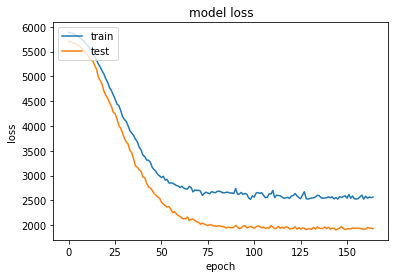

[62.433636 49.67558  42.502487 ... 43.92633  56.03353  59.64959 ]
[61.836246 38.87078  37.819466 ... 34.04607  49.519745 58.568676]
0.9912


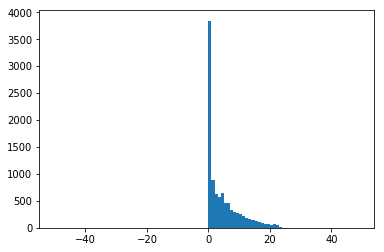

In [167]:
plotHistory(history_merge)

predict1 = model_merge.predict(X_test1).reshape(-1)
predict0 = model_merge.predict(X_test0).reshape(-1)
predict_merge = predict1 - predict0
print predict1
print predict0
print sum(predict_merge > 0) / float(len(X_test))

plt.clf()
plt.hist(predict_merge, bins = range(-50, 50, 1))
plt.show()

In [ ]:
exportPredictions('output_nn_merge_1.txt', predict, thresh=0)

# SVM

In [18]:
svm1 = svm.SVR(kernel='rbf', C=24.0, gamma='auto', epsilon=0.001)
svm1.fit(X_train1, y_train1)

svm_predict1 = svm1.predict(X_test)

svm0 = svm.SVR(kernel='rbf', C=24.0, gamma='auto', epsilon=0.001)
svm0.fit(X_train0, y_train0)
svm_predict0 = svm0.predict(X_test)

svm_predict = svm_predict1 - svm_predict0

print svm_predict
print sum(svm_predict > 0)

exportPredictions('output_svm.txt', svm_predict)

[-9.18026084 -2.79257229 -0.26229152 ... -0.56548187 18.25993769
 -0.37911858]
3084
